# Data Scientist Professional Case Study

### Company Background

Inn the Neighborhood is an online platform that allows people to rent out their properties for short stays. At the moment, only 2% of people who come to the site interested in renting out their homes start to use it.

The product manager would like to increase this. They want to develop an application to help people estimate how much they could earn renting out their living space. They hope that this would make people more likely to sign up.



### Customer Question

The product manager would like to know:
- Can you develop a way to predict how much someone could earn from renting their property that could power the application?




### Success Criteria

They want to avoid estimating prices that are more than 25 dollars off of the actual price, as this may discourage people.


### Dataset

The data you will use for this analysis can be accessed here: `"data/rentals.csv"`

<h3>Data Wrangling</h3>

<h4>Imports</h4>

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h4>Load</h4>

In [72]:
#Reading in the data
df = pd.read_csv("data/rentals.csv")

<h4>Assess</h4>

In [73]:
#A look at ten random rows of the data
df.sample(10)

,id,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
2010,8763529,37.75789,-122.41317,Hostel,Shared room,2.0,1.0,2,$55.00
7644,37860584,37.78386,-122.39766,Apartment,Shared room,2.5,1.0,30,$50.00
946,2315086,37.78629,-122.44570,Apartment,Private room,1.5,1.0,3,$145.00
5000,25921865,37.72160,-122.40301,House,Private room,1.0,1.0,1,$85.00
5043,26134644,37.80155,-122.41836,Condominium,Entire home/apt,2.0,3.0,30,$505.00
3751,20331337,37.77249,-122.43543,Apartment,Private room,1.0,1.0,2,$10.00
5664,29843679,37.80401,-122.40645,Apartment,Entire home/apt,1.0,1.0,30,$228.00
4599,23827577,37.78603,-122.41516,Apartment,Entire home/apt,1.0,0.0,30,$81.00
3727,20173537,37.71971,-122.40058,Apartment,Entire home/apt,1.0,0.0,30,$90.00
6953,34607614,37.71328,-122.46705,House,Private room,1.0,1.0,1,$99.00


In [74]:
#Inspecting column types and null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8111 entries, 0 to 8110
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              8111 non-null   int64  
 1   latitude        8111 non-null   float64
 2   longitude       8111 non-null   float64
 3   property_type   8111 non-null   object 
 4   room_type       8111 non-null   object 
 5   bathrooms       8099 non-null   float64
 6   bedrooms        8107 non-null   float64
 7   minimum_nights  8111 non-null   int64  
 8   price           8111 non-null   object 
dtypes: float64(4), int64(2), object(3)
memory usage: 570.4+ KB


In [75]:
df['id'].duplicated().sum()

0

In [76]:
#inspecting rows with null values
null_rows = df[df.isna().sum(axis=1).apply(bool)]
display(null_rows)

,id,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
139,144978,37.79336,-122.42506,Apartment,Private room,NaN,1.0,30,$56.00
181,229240,37.79341,-122.40340,Hostel,Shared room,NaN,1.0,1,$45.00
196,259621,37.79470,-122.40374,Hostel,Shared room,NaN,1.0,1,$45.00
197,259622,37.79441,-122.40473,Hostel,Shared room,NaN,1.0,1,$45.00
267,430692,37.75906,-122.40761,Apartment,Private room,NaN,1.0,31,$68.00
269,431862,37.78321,-122.41969,Apartment,Entire home/apt,1.0,NaN,30,$124.00
352,596042,37.79384,-122.42436,Apartment,Private room,NaN,1.0,30,$63.00
434,785901,37.79313,-122.40443,Hostel,Shared room,NaN,1.0,1,$45.00
435,786492,37.79421,-122.40310,Hostel,Shared room,NaN,1.0,1,$45.00
436,786506,37.79260,-122.40339,Hostel,Shared room,NaN,1.0,1,$45.00


<h4>Issues Observed</h4>
<ul>
    <li>Since there are no duplicate observations, the id column is redundant.</li>
    <li>The price column is not in a numerical format.</li>
    <li>There are a total of 16 rows with missing values present.</li>
</ul>

<h4>Fixes</h4>
<ul>
    <li>Drop the id column.</li>
    <li>Remove the dollar sign and convert the string to a floating point number.</li>
    <li>Since the rows with null values account for less than 1% of our data, the rows will be dropped.</li>
</ul>

In [77]:
#dropping the id column
df.drop('id', axis=1, inplace=True)

In [78]:
#test
assert 'id' not in df.columns

In [79]:
#converting the price column to float
conv = np.vectorize(lambda x: float(x[1:].replace(',','')))
df['price'] = conv(df['price'])

In [80]:
#test
assert df['price'].dtype == 'float64'

In [81]:
#dropping rows with null values
df.dropna(inplace=True)

In [82]:
#test
assert df.isna().sum(axis=1).sum() == 0

<h3>Exploratory Data Analysis</h3>

In [83]:
df.head()

,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
0,37.76931,-122.43386,Apartment,Entire home/apt,1.0,1.0,1,170.0
1,37.75402,-122.45805,House,Private room,1.0,1.0,1,99.0
2,37.74511,-122.42102,Apartment,Entire home/apt,1.0,2.0,30,235.0
3,37.76669,-122.45250,Apartment,Private room,4.0,1.0,32,65.0
4,37.76487,-122.45183,Apartment,Private room,4.0,1.0,32,65.0


In [84]:
#Summary statistics
df.describe()

,latitude,longitude,bathrooms,bedrooms,minimum_nights,price
count,8095.000000,8095.000000,8095.000000,8095.000000,8.095000e+03,8095.000000
mean,37.766017,-122.430126,1.395862,1.346387,1.236963e+04,225.646325
std,0.022937,0.026974,0.923114,0.925888,1.111454e+06,412.575797
min,37.704630,-122.513060,0.000000,0.000000,1.000000e+00,0.000000
25%,37.751430,-122.442855,1.000000,1.000000,2.000000e+00,100.000000
50%,37.769090,-122.424670,1.000000,1.000000,4.000000e+00,150.000000
75%,37.785600,-122.410625,1.500000,2.000000,3.000000e+01,240.000000
max,37.828790,-122.368570,14.000000,14.000000,1.000000e+08,10000.000000


> Let us visualize some the price column to gain insight on how to deal with its outliers.

<Figure size 700x500 with 0 Axes>

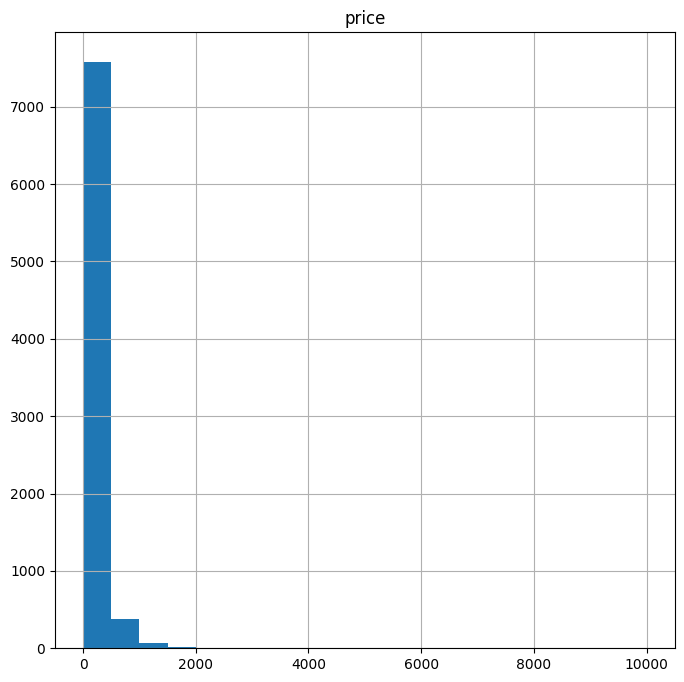

In [85]:
#the distribution of the price column
_ = df.hist(column='price',figsize=(8,8), bins=20)

In [86]:
#Measure of skew
df['price'].skew()

16.15205521063268

> The price column is heavily skewed. As this is our target variable, our model will suffer from large inaccuracies if not handled. Any rows with prices above $170 will be dropped as a solution. Also, since the app is for short stays only, rows with minimum nights greater than 6 months (180 nights) will be dropped.

In [87]:
#rows to drop to mitigate effect of outliers
to_drop = df[(df['minimum_nights'] > 180) | (df['price'] > 170)].index

df.drop(index=to_drop, inplace=True)

In [88]:
df.describe()

,latitude,longitude,bathrooms,bedrooms,minimum_nights,price
count,4525.000000,4525.000000,4525.000000,4525.000000,4525.000000,4525.000000
mean,37.762743,-122.432271,1.316133,0.967293,16.755801,105.991602
std,0.023874,0.028502,1.024999,0.554931,16.840958,36.258496
min,37.704630,-122.513060,0.000000,0.000000,1.000000,0.000000
25%,37.745710,-122.446660,1.000000,1.000000,2.000000,79.000000
50%,37.764650,-122.425320,1.000000,1.000000,7.000000,105.000000
75%,37.782670,-122.411300,1.000000,1.000000,30.000000,138.000000
max,37.828790,-122.370090,14.000000,14.000000,180.000000,170.000000


<Figure size 700x500 with 0 Axes>

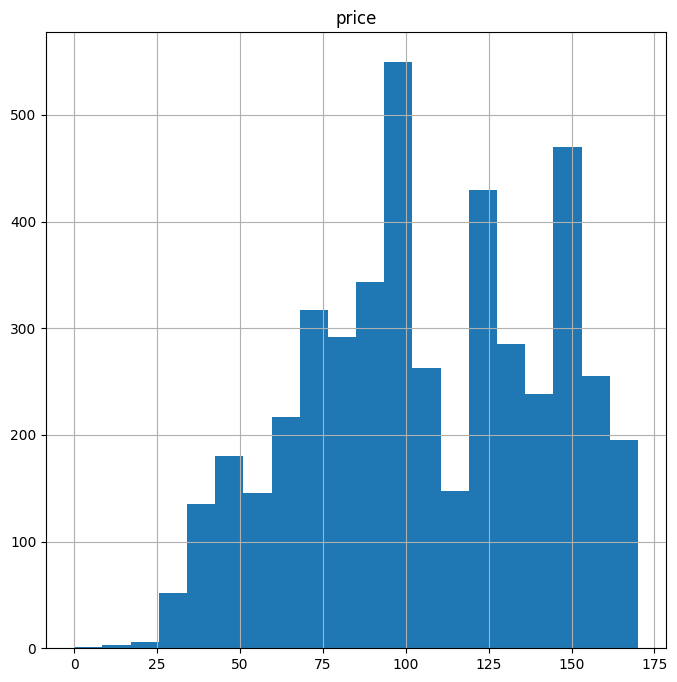

In [89]:
#the distribution of the price column
_ = df.hist(column='price',figsize=(8,8), bins=20)

In [90]:
#Measure of skew
df['price'].skew()

-0.1353228507163048

> The skewness in the price column has been handled. We will now explore and visualize the remainder of the independent variables.

In [91]:
#number of unique property and room types
df[['property_type', 'room_type']].nunique()

property_type    26
room_type         4
dtype: int64

In [92]:
#Proportions by property and room type
pd.DataFrame(df[['property_type', 'room_type']].value_counts(normalize=True)).rename({0:'proportions'}, axis=1)

,,proportions
property_type,room_type,
Apartment,Entire home/apt,0.249282
House,Private room,0.245525
Apartment,Private room,0.147403
Guest suite,Entire home/apt,0.071602
Condominium,Private room,0.045304
House,Entire home/apt,0.041326
Condominium,Entire home/apt,0.029171
House,Shared room,0.021878
Guest suite,Private room,0.015912


<Figure size 700x500 with 0 Axes>

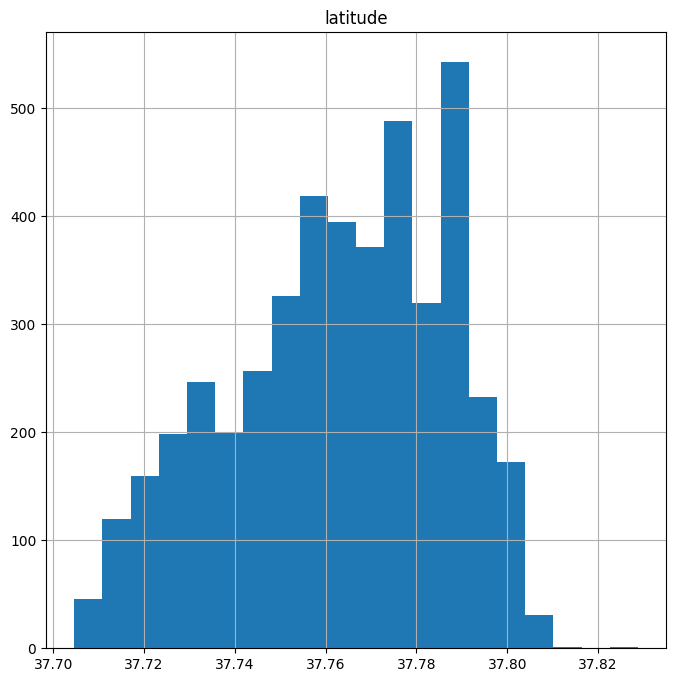

In [93]:
#the distribution of the latitude column
_ = df.hist(column='latitude',figsize=(8,8), bins=20)

<Figure size 700x500 with 0 Axes>

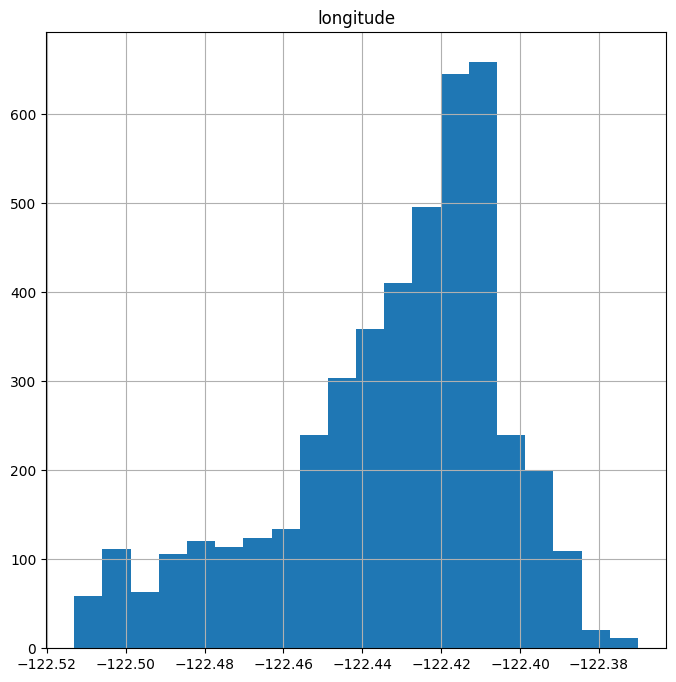

In [94]:
#the distribution of the longitude column
_ = df.hist(column='longitude',figsize=(8,8), bins=20)

<Figure size 700x500 with 0 Axes>

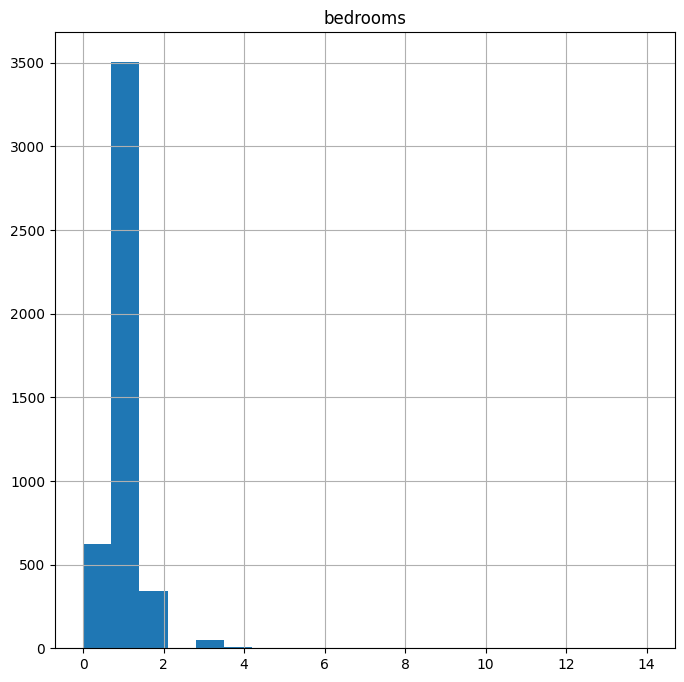

In [95]:
#the distribution of the bedrooms column
_ = df.hist(column='bedrooms',figsize=(8,8), bins=20)

<Figure size 900x400 with 0 Axes>

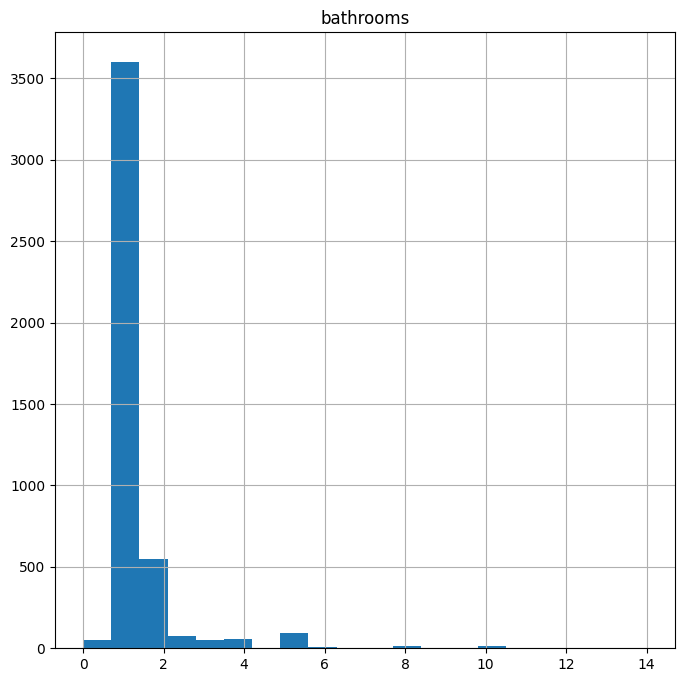

In [105]:
#the distribution of the bathrooms column
_ = df.hist(column='bathrooms',figsize=(8,8), bins=20)

> Bivariate plots for each of the independent variables and the target variable will now be constructed.

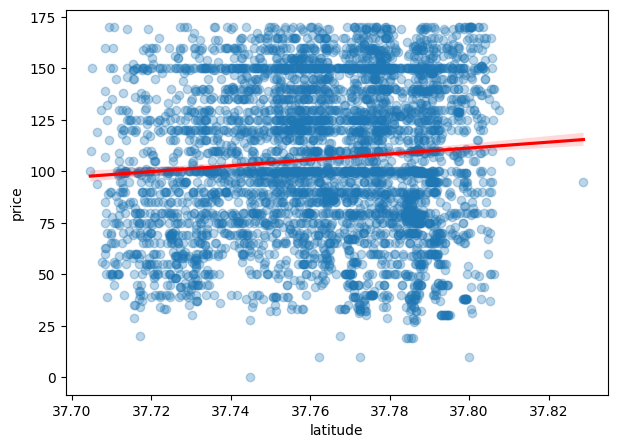

In [97]:
#latitude vs price
plt.figure(figsize=(7,5))
_ = sns.regplot(data=df, x='latitude', y='price', scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})

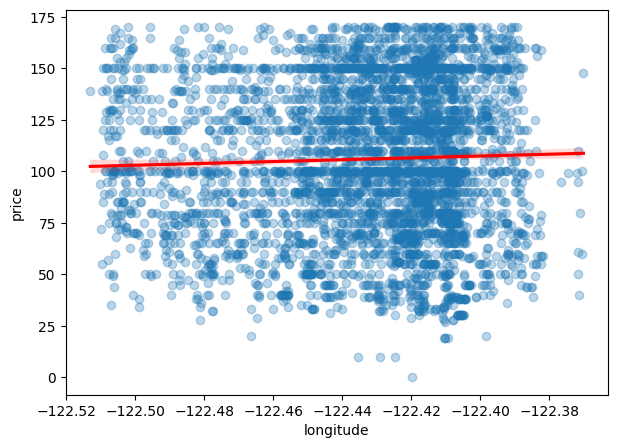

In [98]:
#longitude vs price
plt.figure(figsize=(7,5))
_ = sns.regplot(data=df, x='longitude', y='price', scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})

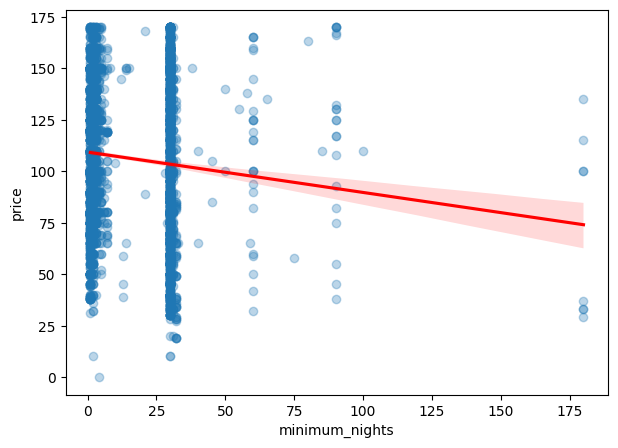

In [99]:
#minimum_nights vs price
plt.figure(figsize=(7,5))
_ = sns.regplot(data=df, x='minimum_nights', y='price', scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})

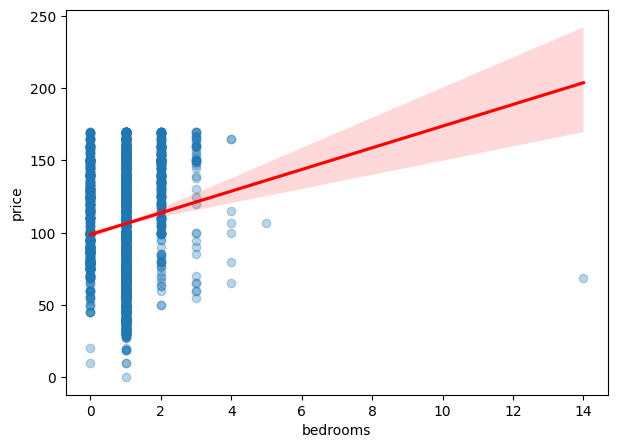

In [100]:
#bedrooms vs price
plt.figure(figsize=(7,5))
_ = sns.regplot(data=df, x='bedrooms', y='price', scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})

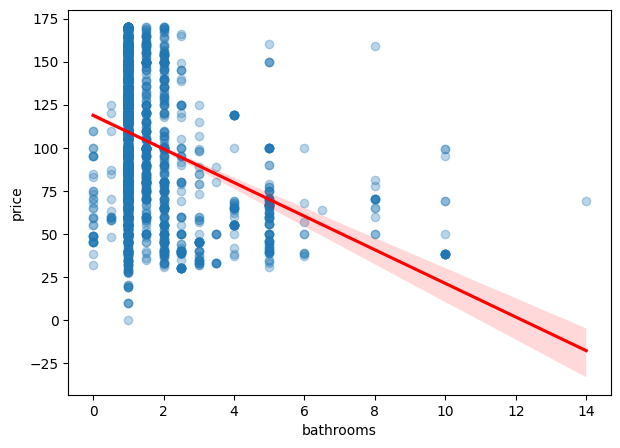

In [101]:
#bathrooms vs price
plt.figure(figsize=(7,5))
_ = sns.regplot(data=df, x='bathrooms', y='price', scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})

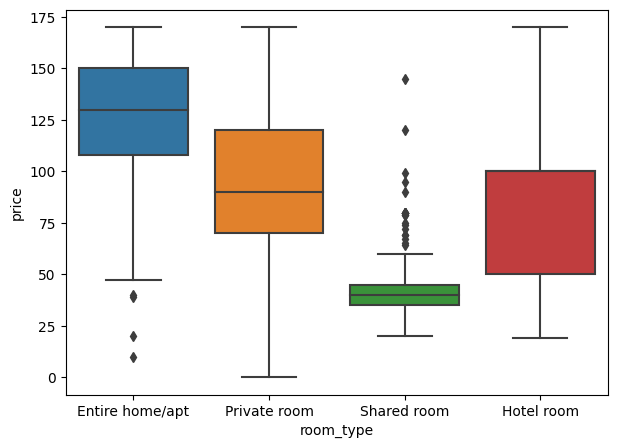

In [102]:
#room_type vs price
plt.figure(figsize=(7,5))
_ = sns.boxplot(data=df, x='room_type', y='price')

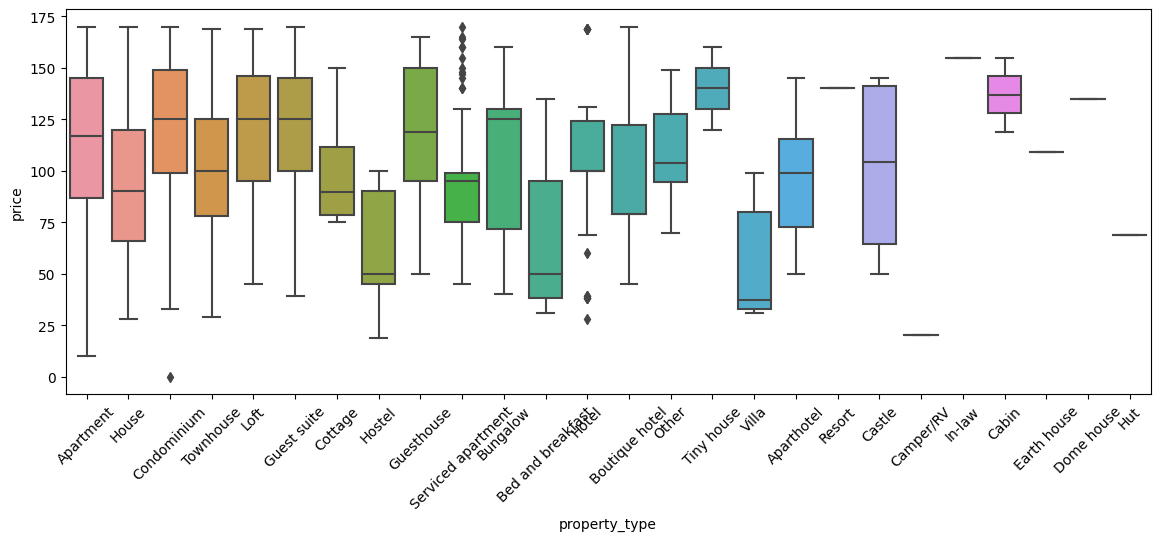

In [103]:
#property_type vs price
plt.figure(figsize=(14,5))
_ = sns.boxplot(data=df, x='property_type', y='price')
_ = plt.xticks(rotation=45)

<h3>Model Development</h3>

> To build our model the XGBRegressor will be the algorithm of choice. As a consequence of having categorical columns, we will first need to encode the data. After this we will use PCA to reduce the dimensionality of the data to 10 features. Hyperparameter tuning will be carried out using RandomizedSearchCV. RMSE is the main evaluation metric and must be less than 25 across in both training and test sets. R-squared will also be included as an evaluation metric.

<h4>Imports</h4>

In [106]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

<h4>Model Training and Validation</h4>

In [107]:
y = df['price'].values
X = pd.get_dummies(df.drop(['price'], axis=1)).values

In [108]:
scaler =  StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [110]:
xgm = XGBRegressor()

In [111]:
params_xgm = {"max_depth":range(3,8),
              "min_child_weight" : range(1,5),
              'learning_rate':np.arange(0.005,0.07, 0.005),
              'n_estimators':range(200,360, 20),
              'subsample': np.arange(0.3, 0.8, 0.1),
              'colsample_bytree': np.arange(0.5, 0.8, 0.1),
              'gamma': [0,1,5]}

In [112]:
xgb_rs = RandomizedSearchCV(xgm, param_distributions=params_xgm,n_iter=300)
xgb_rs.fit(X_train,y_train)

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_ca...
                                          reg_alpha=None, reg_lambda=None, ...),
                   n_iter=300,
                   param_distributions={'colsample_bytree': array([0.5, 0.6, 0.7, 0.8]),
                                        'gamma': [0, 1, 5],
                                        'learning_rate': array([0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 , 0.045,
       0.05 , 0.055, 0.06 , 0.065]),
                                        'max_depth': range(3, 8),
                                        'min_child_weight': range(1, 5),
                                        'n_estimators': range(200, 360, 20),
                                        'subsample': array([0.3, 0.4, 0.5, 0.6, 0.7])})

<h4>Model Evaluation</h4>

In [113]:
xgb_rs.best_params_

{'subsample': 0.6000000000000001,
 'n_estimators': 200,
 'min_child_weight': 4,
 'max_depth': 7,
 'learning_rate': 0.034999999999999996,
 'gamma': 1,
 'colsample_bytree': 0.6}

In [114]:
model = xgb_rs.best_estimator_

In [115]:
y_pred_train = model.predict(X_train)
print(f'Train RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train))}. Train R-squared {r2_score(y_train, y_pred_train)}')

Train RMSE: 17.46356983420068. Train R-squared 0.7692211955136277


In [116]:
y_pred_test = model.predict(X_test)
print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test))}. Test R-squared {r2_score(y_test, y_pred_test)}')

Test RMSE: 23.556001444160664. Test R-squared 0.5678306033073692


> After training and tuning, our model satisfies the compulsory requirement of having an error less than $25 on both training and test sets. This model can be reliably used to boost customer retention, as it can help customers predict prices with greater accuracy.